In [1]:
cd 13510

In [2]:
punlearn contour_map
plist contour_map
/bin/rm -rf contour_map
mkdir contour_map


Parameters for /home/kjg/cxcds_param4/contour_map.par

        infile =                  Input file
       outfile =                  Output file name
       (binimg = )                Output image file
     (distance = 75)              Maximum distance from starting pixel [physical pixels]
        (shape = circle)          Shape of max distance
       (levels = )                Specific contour levels
      (nlevels = 20)              Number of contour levels
        (scale = log)             Spacing of contour levels between min and max pixel values
  (maxcontours = 1000)            Maximum number of regions to create
      (verbose = 0)               Tool chatter level
      (clobber = no)              Remove outfile if it already exists?
         (mode = ql)              



In [3]:
aconvolve img.fits contour_map/img.sm "lib:gaus(2,5,5,11,11)" method=slide edge=const const=0 clob+

In [4]:
time contour_map \
  infile=contour_map/img.sm \
  outfile=contour_map/cont.map \
  binimg=contour_map/cont.img \
  distance=500 shape=circle \
  levels=0.14,0.16,0.18,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.8,0.9,1.0,1.1,1.2,1.3 \
  maxcontours=75 \
  verb=1 clob+

contour_map
          infile = contour_map/img.sm
         outfile = contour_map/cont.map
          binimg = contour_map/cont.img
        distance = 500
           shape = circle
          levels = 0.14,0.16,0.18,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.8,0.9,1.0,1.1,1.2,1.3
         nlevels = 20
           scale = log
     maxcontours = 75
         verbose = 1
         clobber = yes
            mode = ql

Contour lower limit: 1.2 (434,283)
Contour lower limit: 1.1 (434,274)
Contour lower limit: 1.0 (440,295)
Contour lower limit: 0.9 (451,292)
Contour lower limit: 0.8 (415,266)
Contour lower limit: 0.7 (463,307)
Contour lower limit: 0.65 (443,216)
Contour lower limit: 0.6 (392,243)
Contour lower limit: 0.55 (429,207)
Contour lower limit: 0.5 (394,323)
Contour lower limit: 0.5 (335,225)
Contour lower limit: 0.45 (383,336)
Contour lower limit: 0.4 (371,322)
Contour lower limit: 0.4 (208,223)
Contour lower limit: 0.35 (250,234)
Contour lower limit: 0.3 (319,330)
Contour lower li

In [5]:
dmimggrad contour_map/cont.map contour_map/cont.grad sobel mag clob+

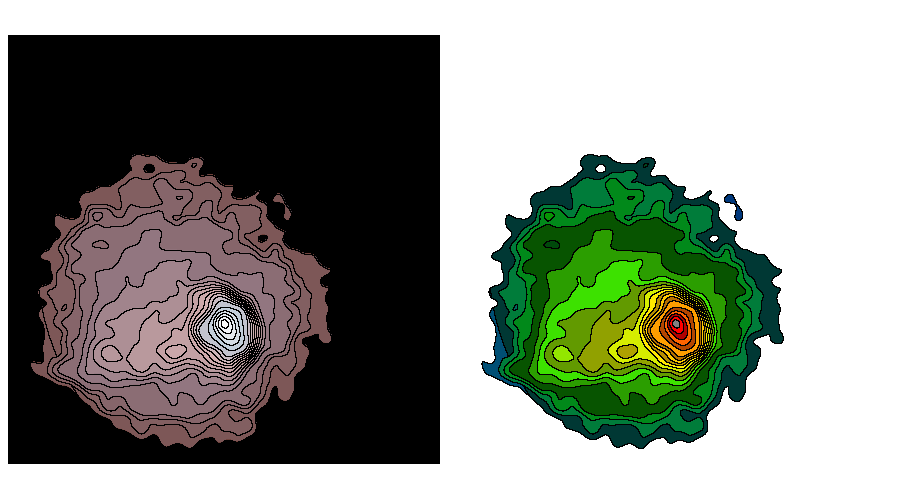

In [6]:
ds9 -geometry 900x600 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  contour_map/cont.img -scale log \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask contour_map/cont.grad -nomask \
  -region select all -region color black -region select none \
  -block to 2 \
  contour_map/cont.map -scale linear \
  -region delete all \
  -mask color black -mask contour_map/cont.grad -nomask \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png contour_map/cont.abin.png -quit

display < contour_map/cont.abin.png